In [1]:
import os
os.chdir(r'C:\Users\orger\VScodeProjects\RawDatConversion')

In [4]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
filepath = Path(r"F:\20221204\h2bhuc_f01_4dpf\dat_process\h2bhuc_f01_4dpf_02.zarr")

In [10]:
ds = zarr.open(filepath,mode='r')
ds.shape

(2495, 141, 450, 399)

In [14]:
snap = ds[:,:41,:60,:80]


In [16]:
snap.shape

(2495, 41, 60)

[(1028.0, 1034.0)]

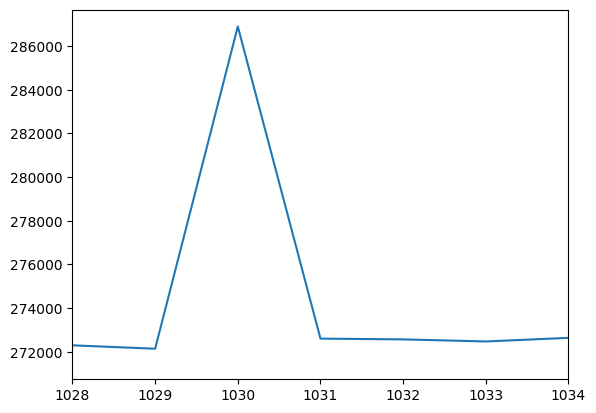

In [20]:
intensity = np.sum(snap, axis=(1,2))
fig, ax = plt.subplots()
ax.plot(intensity)
ax.set(
    xlim=[1028,1034]
)

In [26]:
list(ds.attrs.items())

[('FID_fin', [2258820, 2259071]),
 ('FID_init', [1614708, 1614959]),
 ('FID_off', 1830759),
 ('FID_on', 1828488),
 ('FID_stim_ix', 772992),
 ('VID_fin', 6601),
 ('VID_init', 4097),
 ('VID_off', 4932),
 ('VID_on', 4932),
 ('VID_stim_ix', 831),
 ('exp_name', 'h2bhuc_f01_4dpf_run2'),
 ('post_stim_time', 600),
 ('pre_stim_time', 300),
 ('vol_rate', 2.780307692307692)]

In [29]:
6601 - 4097, ds.shape[0]

(2504, 2495)